# Project 1

In [1]:
import pandas as pd

In [2]:
cols = ["Length of Vectors", "Total Instructions", "R-Type", "I-Type", "J-Type", 
        "R-Type Percentage", "I-Type Percentage", "J-Type Percentage", 
        "CPI", "ALU", "Jump", "Branch", "Memory", "Other", "Energy Consumption", "MIPS/mW"]
df = pd.DataFrame(columns=cols)

In [3]:
df.head()

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW


In [4]:
eight = [8, 346, 94, 210, 42, None, None, None, None, 227, 42, 58, 17, 2, None, None]
sixteen = [16, 990, 290, 564, 136, None, None, None, None, 651, 136, 168, 33, 2, None, None]
thirty_two = [32, 3502, 1090, 1884, 528, None, None, None, None, 2315, 528, 592, 65, 2, None, None]

In [5]:
df.loc[len(df)] = eight
df.loc[len(df)] = sixteen
df.loc[len(df)] = thirty_two

In [6]:
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,NaN,NaN,NaN,NaN,227.0,42.0,58.0,17.0,2.0,NaN,NaN
1,16.0,990.0,290.0,564.0,136.0,NaN,NaN,NaN,NaN,651.0,136.0,168.0,33.0,2.0,NaN,NaN
2,32.0,3502.0,1090.0,1884.0,528.0,NaN,NaN,NaN,NaN,2315.0,528.0,592.0,65.0,2.0,NaN,NaN


In [7]:
df["R-Type Percentage"] = (df["R-Type"] / df["Total Instructions"]) 
df["I-Type Percentage"] = (df["I-Type"] / df["Total Instructions"]) 
df["J-Type Percentage"] = (df["J-Type"] / df["Total Instructions"]) 

df["CPI"] = df["R-Type Percentage"] * 2 + df["I-Type Percentage"] * 3 + df["J-Type Percentage"] * 4

In [8]:
df = df.round({"R-Type Percenage": 2, "I-Type Percentage": 2, "J-Type Percentage": 2, "CPI": 2}) 
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,0.271676,0.61,0.12,2.85,227.0,42.0,58.0,17.0,2.0,NaN,NaN
1,16.0,990.0,290.0,564.0,136.0,0.292929,0.57,0.14,2.84,651.0,136.0,168.0,33.0,2.0,NaN,NaN
2,32.0,3502.0,1090.0,1884.0,528.0,0.311251,0.54,0.15,2.84,2315.0,528.0,592.0,65.0,2.0,NaN,NaN


In [9]:
df["Energy Consumption"] = df["ALU"] * 2 + df["Jump"] * 4 + df["Branch"] * 5 + df["Memory"] * 20 + df["Other"] * 3

In [10]:
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,0.271676,0.61,0.12,2.85,227.0,42.0,58.0,17.0,2.0,1258.0,NaN
1,16.0,990.0,290.0,564.0,136.0,0.292929,0.57,0.14,2.84,651.0,136.0,168.0,33.0,2.0,3352.0,NaN
2,32.0,3502.0,1090.0,1884.0,528.0,0.311251,0.54,0.15,2.84,2315.0,528.0,592.0,65.0,2.0,11008.0,NaN


In [11]:
df["MIPS/mW"] = (df["Total Instructions"] * 10**6) / df["Energy Consumption"]

In [12]:
df

,Length of Vectors,Total Instructions,R-Type,I-Type,J-Type,R-Type Percentage,I-Type Percentage,J-Type Percentage,CPI,ALU,Jump,Branch,Memory,Other,Energy Consumption,MIPS/mW
0,8.0,346.0,94.0,210.0,42.0,0.271676,0.61,0.12,2.85,227.0,42.0,58.0,17.0,2.0,1258.0,275039.745628
1,16.0,990.0,290.0,564.0,136.0,0.292929,0.57,0.14,2.84,651.0,136.0,168.0,33.0,2.0,3352.0,295346.062053
2,32.0,3502.0,1090.0,1884.0,528.0,0.311251,0.54,0.15,2.84,2315.0,528.0,592.0,65.0,2.0,11008.0,318132.267442


In [13]:
import matplotlib.pyplot as plt

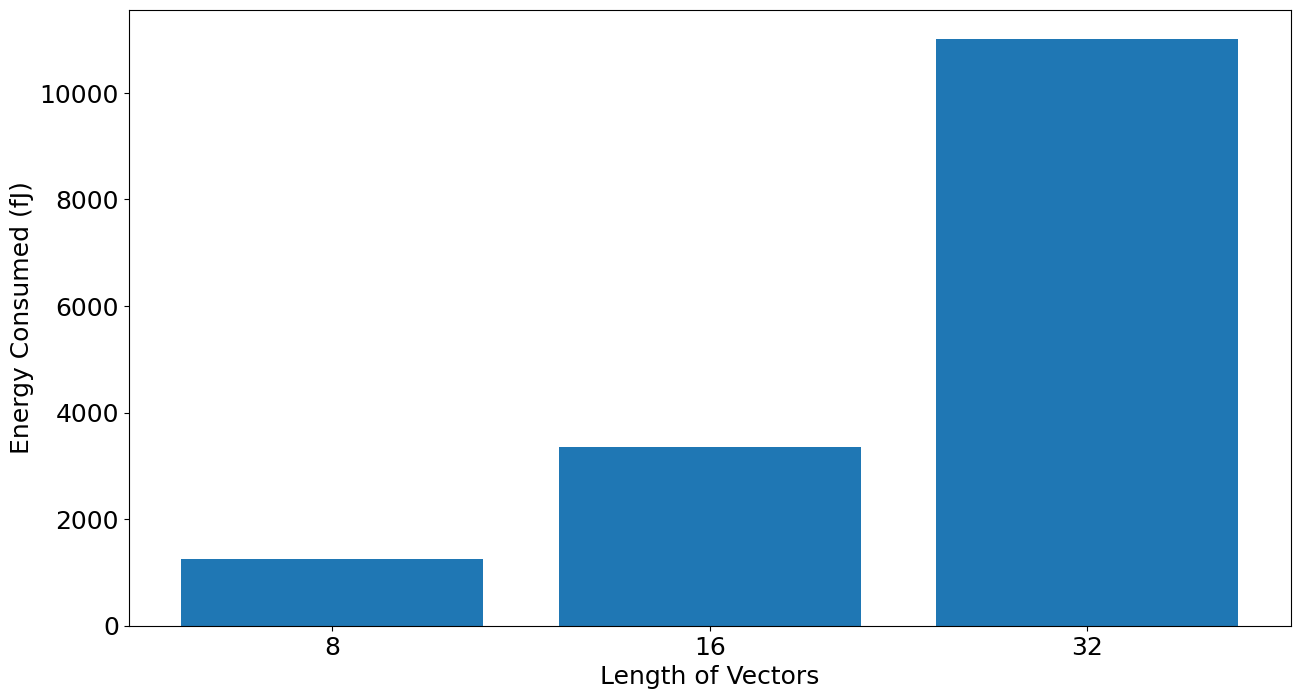

In [14]:
plt.figure(figsize=(15, 8))
plt.bar([str(int(x)) for x in df["Length of Vectors"].values.tolist()], df["Energy Consumption"])
plt.xlabel("Length of Vectors", fontdict={"fontsize": 18})
plt.ylabel("Energy Consumed (fJ)", fontdict={"fontsize": 18})
plt.tick_params(labelsize=18)
plt.savefig("Images/energy_consumption.pdf", dpi=1600)
plt.show()

In [15]:
df["Execution Time"] = df["Total Instructions"] * df["CPI"] 

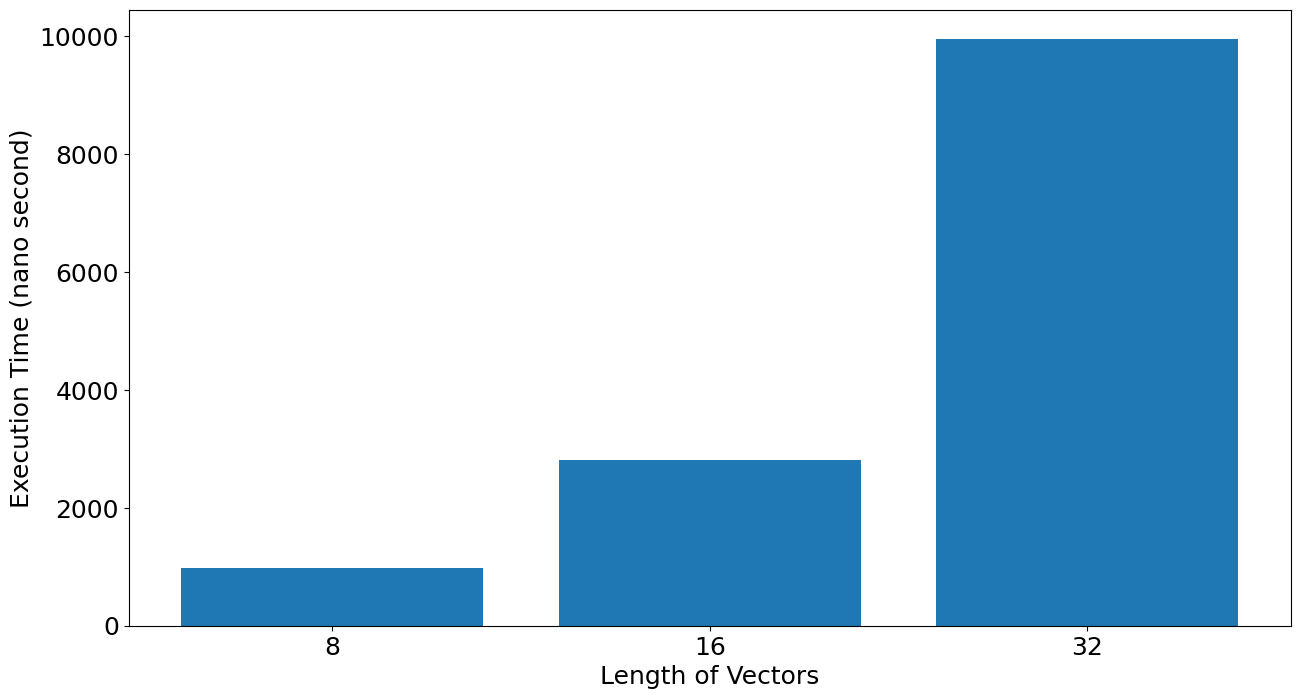

In [16]:
plt.figure(figsize=(15, 8))
plt.bar([str(int(x)) for x in df["Length of Vectors"].values.tolist()], df["Execution Time"])
plt.xlabel("Length of Vectors", fontdict={"fontsize": 18})
plt.ylabel("Execution Time (nano second)", fontdict={"fontsize": 18})
plt.tick_params(labelsize=18)
plt.savefig("Images/execution_time.pdf", dpi=1600)
plt.show()

# Project 2

In [88]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

### Direct Mapped Cache

In [211]:
df = {
    "Number of Blocks": [4, 4, 4, 4, 8, 8, 8, 8, 16, 16, 16, 16, 32, 32, 32, 32],
    "Cache Block Size": [4, 8, 16, 32, 4, 8, 16, 32, 4, 8, 16, 32, 4, 8, 16, 32],
    "Memory Access Count": [103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103],
    "Cache Hit Count": [2, 88, 95, 99, 76, 89, 96, 99, 77, 90, 96, 99, 78, 90, 96, 99],
    "Cache Miss Count": [101, 15, 8, 4, 27, 14, 7, 4, 26, 13, 7, 4, 25, 13, 7, 4],
    "Cache Hit Rate": [2, 85, 92, 96, 74, 86, 93, 96, 75, 87, 93, 96, 76, 87, 93, 96],
    "Cache Size (Bytes)": [64, 128, 256, 512, 128, 256, 512, 1024, 256, 512, 1024, 2048, 512, 1024, 2048, 4096]
}

df = pd.DataFrame(df)
display(df)

,Number of Blocks,Cache Block Size,Memory Access Count,Cache Hit Count,Cache Miss Count,Cache Hit Rate,Cache Size (Bytes)
0,4,4,103,2,101,2,64
1,4,8,103,88,15,85,128
2,4,16,103,95,8,92,256
3,4,32,103,99,4,96,512
4,8,4,103,76,27,74,128
5,8,8,103,89,14,86,256
6,8,16,103,96,7,93,512
7,8,32,103,99,4,96,1024
8,16,4,103,77,26,75,256
9,16,8,103,90,13,87,512


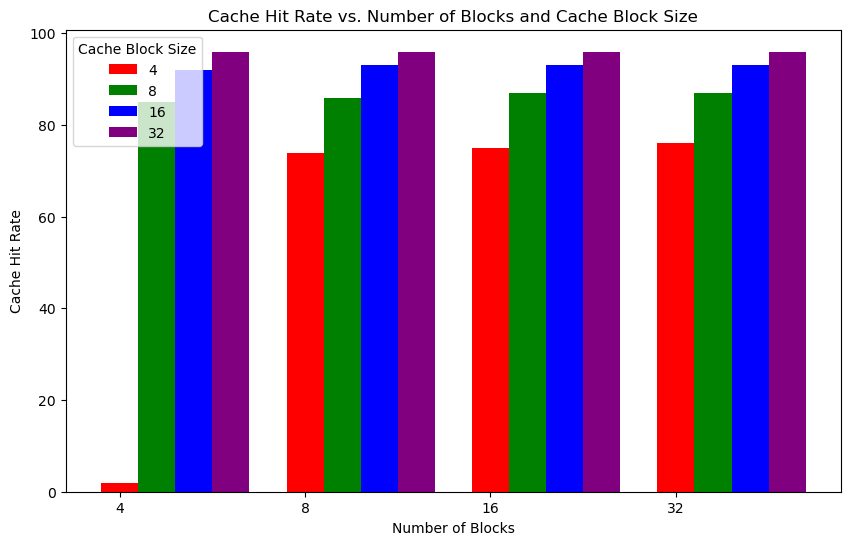

In [212]:
colors = ['red', 'green', 'blue', 'purple']
groups = df['Number of Blocks'].unique()
x_axis = range(len(groups))

fig, ax = plt.subplots(figsize=(10, 6))

for i, group in enumerate(groups):
    df_filtered = df[df['Number of Blocks'] == group]
    for j, cache_block_size in enumerate(df_filtered['Cache Block Size'].unique()):
        df_filtered_cache_block_size = df_filtered[df_filtered['Cache Block Size'] == cache_block_size]
        ax.bar(x_axis[i] + j * 0.2, df_filtered_cache_block_size['Cache Hit Rate'], width=0.2, color=colors[j])

ax.set_xticks(x_axis)
ax.set_xticklabels(groups)
ax.set_xlabel("Number of Blocks")
ax.set_ylabel("Cache Hit Rate")
ax.set_title("Cache Hit Rate vs. Number of Blocks and Cache Block Size")
ax.legend(labels=[f"{size}" for size in df['Cache Block Size'].unique()], title="Cache Block Size")

plt.savefig("./Images/Project_2/Direct_Mapped.pdf")
plt.show()

### Fully Associative Cache

In [213]:
df = {
    "Number of Blocks": [4, 4, 4, 4, 8, 8, 8, 8, 16, 16, 16, 16, 32, 32, 32, 32],
    "Cache Block Size": [4, 8, 16, 32, 4, 8, 16, 32, 4, 8, 16, 32, 4, 8, 16, 32],
    "Memory Access Count": [103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103],
    "Cache Hit Count": [76, 88, 94, 99, 76, 88, 96, 99, 76, 90, 96, 99, 78, 90, 96, 99],
    "Cache Miss Count": [27, 15, 9, 4, 27, 15, 7, 4, 27, 13, 7, 4, 25, 13, 7, 4],
    "Cache Hit Rate": [74, 85, 91, 96, 74, 85, 93, 96, 74, 87, 93, 96, 76, 87, 93, 96],
    "Cache Size (Bytes)": [64, 128, 256, 512, 128, 256, 512, 1024, 256, 512, 1024, 2048, 512, 1024, 2048, 4096]
}

df = pd.DataFrame(df)
display(df)

,Number of Blocks,Cache Block Size,Memory Access Count,Cache Hit Count,Cache Miss Count,Cache Hit Rate,Cache Size (Bytes)
0,4,4,103,76,27,74,64
1,4,8,103,88,15,85,128
2,4,16,103,94,9,91,256
3,4,32,103,99,4,96,512
4,8,4,103,76,27,74,128
5,8,8,103,88,15,85,256
6,8,16,103,96,7,93,512
7,8,32,103,99,4,96,1024
8,16,4,103,76,27,74,256
9,16,8,103,90,13,87,512


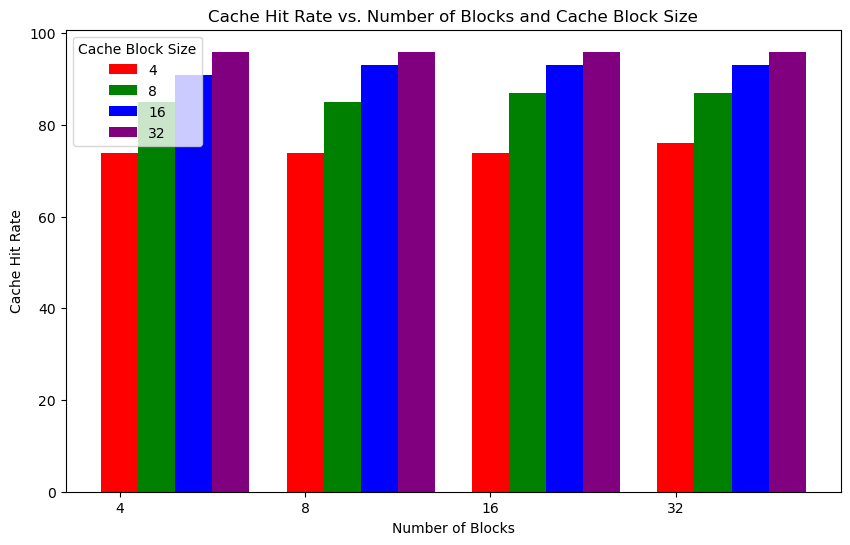

In [214]:
colors = ['red', 'green', 'blue', 'purple']
groups = df['Number of Blocks'].unique()
x_axis = range(len(groups))

fig, ax = plt.subplots(figsize=(10, 6))

for i, group in enumerate(groups):
    df_filtered = df[df['Number of Blocks'] == group]
    for j, cache_block_size in enumerate(df_filtered['Cache Block Size'].unique()):
        df_filtered_cache_block_size = df_filtered[df_filtered['Cache Block Size'] == cache_block_size]
        ax.bar(x_axis[i] + j * 0.2, df_filtered_cache_block_size['Cache Hit Rate'], width=0.2, color=colors[j])

ax.set_xticks(x_axis)
ax.set_xticklabels(groups)
ax.set_xlabel("Number of Blocks")
ax.set_ylabel("Cache Hit Rate")
ax.set_title("Cache Hit Rate vs. Number of Blocks and Cache Block Size")
ax.legend(labels=[f"{size}" for size in df['Cache Block Size'].unique()], title="Cache Block Size")

plt.savefig("./Images/Project_2/Fully_Associative.pdf")
plt.show()

### N-way Set Associative Cache

In [215]:
df = {
    "Number of Blocks": [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, \
                         8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, \
                        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, \
                        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32],
    "Cache Block Size": [4, 4, 4, 8, 8, 8, 16, 16, 16, 32, 32, 32, \
                        4, 4, 4, 8, 8, 8, 16, 16, 16, 32, 32, 32, \
                        4, 4, 4, 8, 8, 8, 16, 16, 16, 32, 32, 32, \
                        4, 4, 4, 8, 8, 8, 16, 16, 16, 32, 32, 32],
    "Set Size": [1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, \
                 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, \
                 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4, \
                 1, 2, 4, 1, 2, 4, 1, 2, 4, 1, 2, 4],
    "Memory Access Count": [103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, \
                           103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, \
                           103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103],
    "Cache Hit Count": [2, 76, 76, 88, 88, 88, 95, 94, 94, 99, 99, 99, \
                        76, 76, 76, 89, 88, 88, 96, 96, 96, 99, 99, 99, \
                        77, 76, 76, 90, 90, 90, 96, 96, 96, 99, 99, 99, \
                        78, 78, 78, 90, 90, 90, 96, 96, 96, 99, 99, 99],
    "Cache Miss Count": [101, 27, 27, 15, 15, 15, 8, 9, 9, 4, 4, 4, \
                         27, 27, 27, 14, 15, 15, 7, 7, 7, 4, 4, 4, \
                         26, 27, 27, 13, 13, 13, 7, 7, 7, 4, 4, 4, \
                         25, 25, 25, 13, 13, 13, 7, 7, 7, 4, 4, 4],
    "Cache Hit Rate": [2, 74, 74, 85, 85, 85, 92, 91, 91, 96, 96, 96, \
                       74, 74, 74, 86, 85, 85, 93, 93, 93, 96, 96, 96, \
                       75, 74, 74, 87, 87, 87, 93, 93, 93, 96, 96, 96, \
                       76, 76, 76, 87, 87, 87, 93, 93, 93, 96, 96, 96],
    "Cache Size (Bytes)": [64, 64, 64, 128, 128, 128, 256, 256, 256, 512, 512, 512, \
                           128, 128, 128, 256, 256, 256, 512, 512, 512, 1024, 1024, 1024, \
                           256, 256, 256, 512, 512, 512, 1024, 1024, 1024, 2048, 2048, 2048, \
                           512, 512, 512, 1024, 1024, 1024, 2048, 2048, 2048, 4096, 4096, 4096]
}

df = pd.DataFrame(df)
display(df)

,Number of Blocks,Cache Block Size,Set Size,Memory Access Count,Cache Hit Count,Cache Miss Count,Cache Hit Rate,Cache Size (Bytes)
0,4,4,1,103,2,101,2,64
1,4,4,2,103,76,27,74,64
2,4,4,4,103,76,27,74,64
3,4,8,1,103,88,15,85,128
4,4,8,2,103,88,15,85,128
5,4,8,4,103,88,15,85,128
6,4,16,1,103,95,8,92,256
7,4,16,2,103,94,9,91,256
8,4,16,4,103,94,9,91,256
9,4,32,1,103,99,4,96,512


#### For Set Size 1

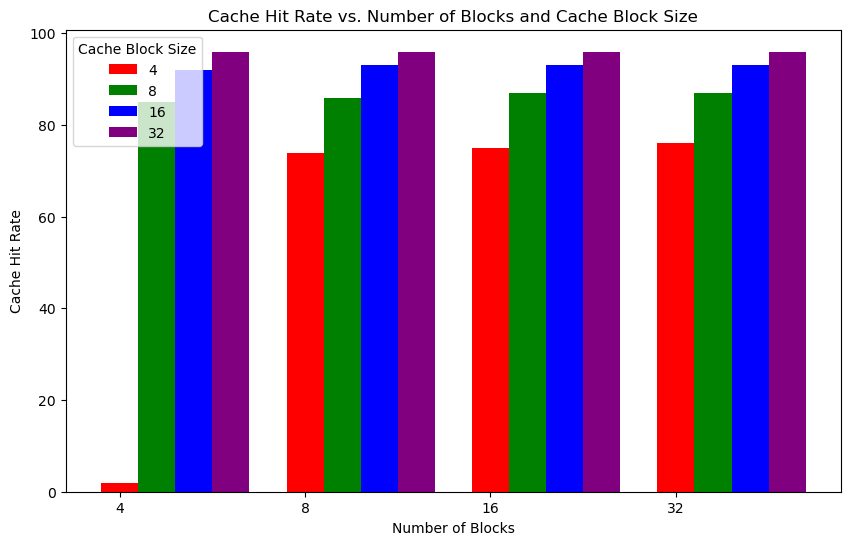

In [218]:
new_df = df[df["Set Size"] == 1]

colors = ['red', 'green', 'blue', 'purple']
groups = new_df['Number of Blocks'].unique()
# x_axis = range(len(groups))
x_axis = [0, 1, 2, 3]

fig, ax = plt.subplots(figsize=(10, 6))

for i, group in enumerate(groups):
    df_filtered = new_df[new_df['Number of Blocks'] == group]
    for j, cache_block_size in enumerate(df_filtered['Cache Block Size'].unique()):
        df_filtered_cache_block_size = df_filtered[df_filtered['Cache Block Size'] == cache_block_size]
        ax.bar(x_axis[i] + j * 0.2, df_filtered_cache_block_size['Cache Hit Rate'], width=0.2, color=colors[j])

ax.set_xticks(x_axis)
ax.set_xticklabels(groups)
ax.set_xlabel("Number of Blocks")
ax.set_ylabel("Cache Hit Rate")
ax.set_title("Cache Hit Rate vs. Number of Blocks and Cache Block Size")
ax.legend(labels=[f"{size}" for size in df['Cache Block Size'].unique()], title="Cache Block Size")

plt.savefig("./Images/Project_2/Set_Associative_1.pdf")
plt.show()

#### For Set Size 2

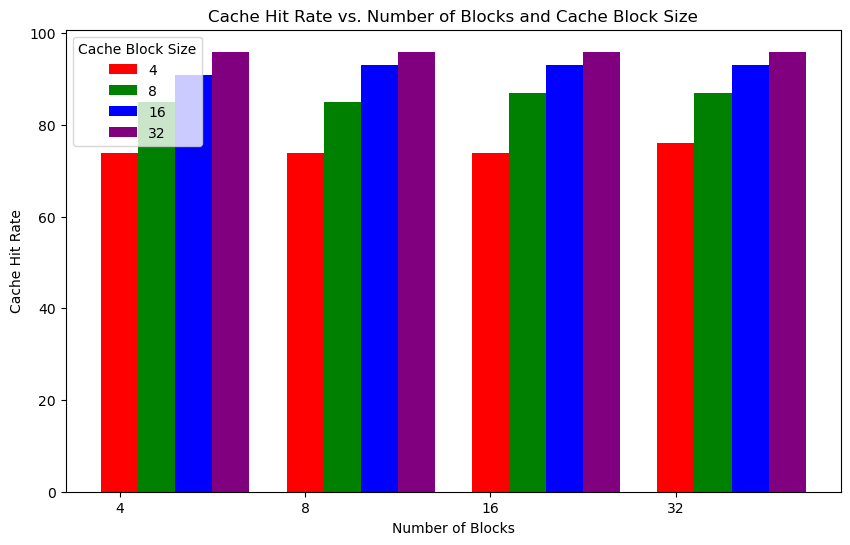

In [219]:
new_df = df[df["Set Size"] == 2]

colors = ['red', 'green', 'blue', 'purple']
groups = new_df['Number of Blocks'].unique()
# x_axis = range(len(groups))
x_axis = [0, 1, 2, 3]

fig, ax = plt.subplots(figsize=(10, 6))

for i, group in enumerate(groups):
    df_filtered = new_df[new_df['Number of Blocks'] == group]
    for j, cache_block_size in enumerate(df_filtered['Cache Block Size'].unique()):
        df_filtered_cache_block_size = df_filtered[df_filtered['Cache Block Size'] == cache_block_size]
        ax.bar(x_axis[i] + j * 0.2, df_filtered_cache_block_size['Cache Hit Rate'], width=0.2, color=colors[j])

ax.set_xticks(x_axis)
ax.set_xticklabels(groups)
ax.set_xlabel("Number of Blocks")
ax.set_ylabel("Cache Hit Rate")
ax.set_title("Cache Hit Rate vs. Number of Blocks and Cache Block Size")
ax.legend(labels=[f"{size}" for size in df['Cache Block Size'].unique()], title="Cache Block Size")

plt.savefig("./Images/Project_2/Set_Associative_2.pdf")
plt.show()

#### For Set Size 4

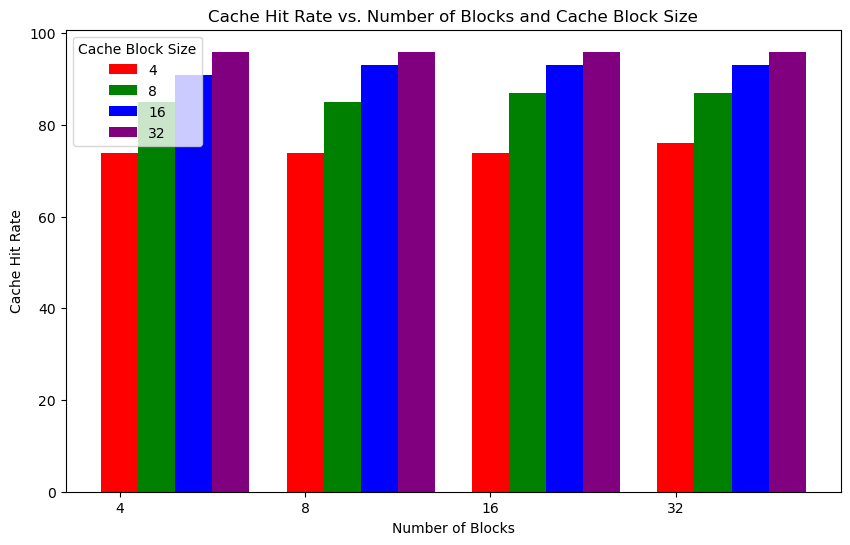

In [220]:
new_df = df[df["Set Size"] == 4]

colors = ['red', 'green', 'blue', 'purple']
groups = new_df['Number of Blocks'].unique()
# x_axis = range(len(groups))
x_axis = [0, 1, 2, 3]

fig, ax = plt.subplots(figsize=(10, 6))

for i, group in enumerate(groups):
    df_filtered = new_df[new_df['Number of Blocks'] == group]
    for j, cache_block_size in enumerate(df_filtered['Cache Block Size'].unique()):
        df_filtered_cache_block_size = df_filtered[df_filtered['Cache Block Size'] == cache_block_size]
        ax.bar(x_axis[i] + j * 0.2, df_filtered_cache_block_size['Cache Hit Rate'], width=0.2, color=colors[j])

ax.set_xticks(x_axis)
ax.set_xticklabels(groups)
ax.set_xlabel("Number of Blocks")
ax.set_ylabel("Cache Hit Rate")
ax.set_title("Cache Hit Rate vs. Number of Blocks and Cache Block Size")
ax.legend(labels=[f"{size}" for size in df['Cache Block Size'].unique()], title="Cache Block Size")

plt.savefig("./Images/Project_2/Set_Associative_4.pdf")
plt.show()